# Course-3: CLEANING DATA IN PYTHON


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [3]:
ride_sharing = pd.read_csv('./DB/ride_sharing_new.csv')

In [4]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [5]:
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


## Data type constraints


### Numeric or categorical?


In [6]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


### Convert user_type from integer to category

The **user_type** column contains information on whether a user is taking a free ride and takes on the following values:

- 1 for free riders.
- 2 for pay per ride.
- 3 for monthly subscribers.


In [7]:
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

In [8]:
# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

In [9]:
# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


### String to integers

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.


In [10]:
# ride_sharing['duration'].sum()

In [11]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.replace('minutes', '')
# Convert duration to integer
ride_sharing['duration'] = ride_sharing['duration_trim'].astype('int')


In [12]:
ride_sharing['duration']

0        12
1        24
2         8
3         4
4        11
         ..
25755    11
25756    10
25757    14
25758    14
25759    29
Name: duration, Length: 25760, dtype: int32

In [13]:
# Write an assert statement making sure of conversion
assert ride_sharing['duration'].dtype == 'int'

##### Calculate and print the mean of 'duration_time'


In [14]:
mean_duration = ride_sharing['duration'].mean()
print("Mean Duration Time:", mean_duration)

Mean Duration Time: 11.389052795031056


##### add a new column named 'tire_sizes'


In [15]:
tire_sizes = np.random.choice(['26″', '27″', '29″'], size=25760)

# Insert the 'tire_sizes' column into the DataFrame
ride_sharing['tire_sizes'] = tire_sizes

## Data range constraints


Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the `maximum tire size to be 27″`


In [16]:
ride_sharing['tire_sizes'].value_counts()


27″    8714
26″    8542
29″    8504
Name: tire_sizes, dtype: int64

### Convert tire_sizes to integer


In [17]:
# Define a mapping for tire sizes
tire_size_mapping = {'26″': 26, '27″': 27, '29″': 29}
# Use the map function to replace string values with integers
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].map(tire_size_mapping)

##### Set all values above 27 to 27


In [18]:

ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

##### convert to categorical


In [19]:
ride_sharing['tire_sizes'] =  ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      17218
Name: tire_sizes, dtype: int64


---


In [20]:

# Generate a range of dates
start_date = datetime.now() - timedelta(days=580)  # 180 days ago
end_date = datetime.now() + timedelta(days=180)    # 180 days in the future

date_range = pd.date_range(start_date, end_date, periods=25760)

# Add 'ride_date' column to the DataFrame
ride_sharing['ride_date'] = date_range.strftime('%Y-%m-%d %H:%M:%S')

### Back to the future

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the **ride_date** column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert **ride_date** to a **datetime** object.


In [21]:
ride_sharing['ride_date']

0        2022-07-14 04:42:17
1        2022-07-14 05:24:46
2        2022-07-14 06:07:15
3        2022-07-14 06:49:45
4        2022-07-14 07:32:14
                ...         
25755    2024-08-12 01:52:20
25756    2024-08-12 02:34:50
25757    2024-08-12 03:17:19
25758    2024-08-12 03:59:48
25759    2024-08-12 04:42:17
Name: ride_date, Length: 25760, dtype: object

In [22]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date
ride_sharing['ride_dt']

0        2022-07-14
1        2022-07-14
2        2022-07-14
3        2022-07-14
4        2022-07-14
            ...    
25755    2024-08-12
25756    2024-08-12
25757    2024-08-12
25758    2024-08-12
25759    2024-08-12
Name: ride_dt, Length: 25760, dtype: object

#### Count the number of rows where the 'ride_dt' is greater than today


In [23]:
import datetime
today = datetime.date.today()
count_future_rides = (ride_sharing['ride_dt'] > today).sum()

# Display the count of rides in the future
print("Number of rides in the future:", count_future_rides)

Number of rides in the future: 6074


##### Set all in the future to today's date


In [24]:
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

In [25]:
# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2024-02-14


In [26]:
# Generate duplicated ride_id values
ride_id_values = np.random.randint(1, 210000, size=25760)
ride_sharing['ride_id'] = ride_id_values.astype(int)

## Uniqueness constraints


### How to find duplicate values?

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.


In [27]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep =False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by = 'ride_id') 
print(f"Number of duplicate bikes: {len(duplicated_rides)}")

Number of duplicate bikes: 2916


In [28]:
# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

       ride_id  duration  user_birth_year
4908       583         6             1964
21654      583         6             1983
1059       605         9             1995
14081      605       100             1997
13473      871         3             1992
...        ...       ...              ...
24942   209779         7             1985
2220    209900        10             1975
16264   209900         7             1967
7494    209922        12             1990
7574    209922        13             1985

[2916 rows x 3 columns]


In [29]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()
ride_dup['duration']

0        12
1        24
2         8
3         4
4        11
         ..
25755    11
25756    10
25757    14
25758    14
25759    29
Name: duration, Length: 25760, dtype: int32

In [30]:
# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}
# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()
ride_unique

,ride_id,user_birth_year,duration
0,13,1976,5.0
1,14,1971,6.0
2,15,1963,10.0
3,23,1997,15.0
4,28,1972,3.0
...,...,...,...
24263,209977,1986,2.0
24264,209980,1984,10.0
24265,209988,1990,10.0
24266,209992,1991,10.0


In [31]:
# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

In [32]:
# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## Membership constraints


In [33]:
airlines = pd.read_csv('./DB/airlines_final.csv')

In [34]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")

print('Safety: ', airlines['safety'].unique(), "\n")

print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



### A note on joins

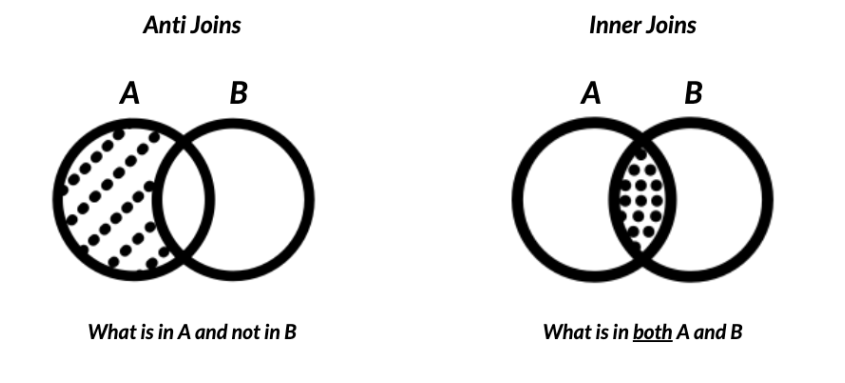

| Left Anti Join on Blood Types           | Inner Join on Blood Types             |
| --------------------------------------- | ------------------------------------- |
| 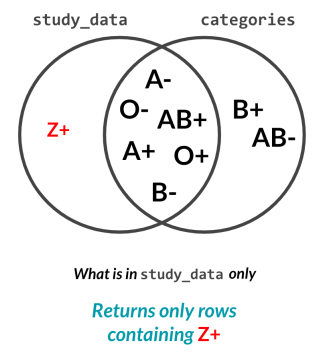 | 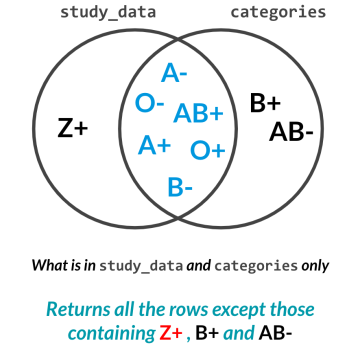 |


In [35]:
data = {
    'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
    'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
    'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
}

categories = pd.DataFrame(data)
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [36]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
airlines[~cat_clean_rows]



,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


The `airlines` DataFrame contains the `day` and wait_min columns, which are categorical and numerical respectively. The `day` column contains the exact `day` a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

`wait_type`: `'short'` for **0-60** min, `'medium'` for **60-180** and `'long'` for _180+_
`day_week`: `'weekday'` if `day` is in the `weekday`, `'weekend'` if day is in the `weekend`.


In [37]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)
airlines['wait_type']

0       medium
1       medium
2       medium
3         long
4         long
         ...  
2472      long
2473    medium
2474    medium
2475    medium
2476      long
Name: wait_type, Length: 2477, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [38]:
# Create mappings and replace
mappings = {
    'Monday': 'weekday',
    'Tuesday': 'weekday',
    'Wednesday': 'weekday',
    'Thursday': 'weekday',
    'Friday': 'weekday',  
    'Saturday': 'weekend',
    'Sunday': 'weekend'  
}


airlines['day_week'] = airlines['day'].replace(mappings)
airlines['day_week']

0       weekday
1       weekday
2       weekday
3       weekday
4       weekday
         ...   
2472    weekday
2473    weekday
2474    weekday
2475    weekday
2476    weekend
Name: day_week, Length: 2477, dtype: object

### Handling and Cleaning Temperature Data

In this dataset, we have recorded temperature data over a span of 150 days. The data includes the date and temperature values. However, there are instances where the temperature values seem to be out of a reasonable range.


In [39]:
import pandas as pd
import random
from datetime import timedelta, datetime

# Generate a date range
start_date = datetime(2019, 3, 3)
end_date = start_date + timedelta(days=149)
date_range = [start_date + timedelta(days=x) for x in range(150)]

# Generate temperature values with some out-of-range values
temperature_values = [random.uniform(10, 30) if random.random() < 0.9 else random.uniform(50, 70) for _ in range(150)]

# Create the DataFrame
data = {'Date': date_range, 'Temperature': temperature_values}
temperatures = pd.DataFrame(data)

# Print the first few rows of the dataset
print(temperatures.head())


        Date  Temperature
0 2019-03-03    18.749640
1 2019-03-04    13.032900
2 2019-03-05    22.916923
3 2019-03-06    60.629123
4 2019-03-07    22.078321


#### To more easily identify outliers, it is helpful to visualize the data.


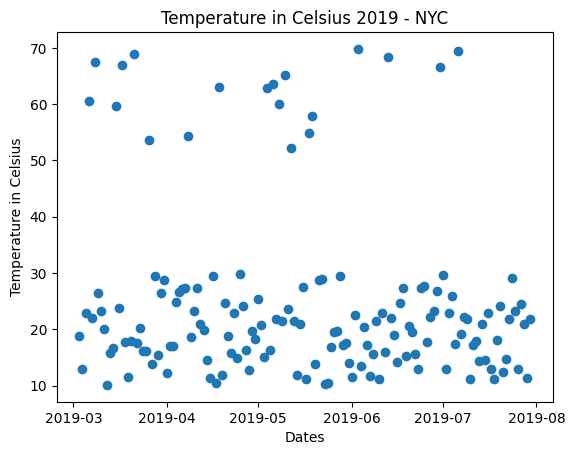

In [40]:
# Import matplotlib 
import matplotlib.pyplot as plt  
# Create scatter plot 
plt.scatter(x = 'Date', y = 'Temperature', data = temperatures)  
# Create title, xlabel and ylabel 
plt.title('Temperature in Celsius 2019 - NYC') 
plt.xlabel('Dates') 
plt.ylabel('Temperature in Celsius') 
# Show plot 
plt.show() 

Temperature `32°C` is also `89.6°F`

Treating temperature data

$$
C = (F - 32) \times \left(\frac{9}{5}\right)
$$


In [41]:
temp_fah = temperatures.loc[temperatures['Temperature'] > 40, 'Temperature']  
temp_cels = (temp_fah - 32) * (5/9)  
temperatures.loc[temperatures['Temperature'] > 40, 'Temperature'] = temp_cels 
temperatures.value_counts(subset='Temperature')

Temperature
10.118542    1
20.921894    1
20.953584    1
20.981417    1
21.007463    1
            ..
16.130341    1
16.365613    1
16.400702    1
16.658860    1
29.876913    1
Length: 150, dtype: int64

In [42]:
# Define temperature labels and corresponding ranges
temperature_labels = ['Low', 'Medium', 'High']
temperature_ranges = [0, 20, 40, np.inf]

# Create a new column 'Temperature Label' based on the ranges
temperatures['Temperature Label'] = pd.cut(temperatures['Temperature'], bins=temperature_ranges, labels=temperature_labels, right=False)

# Display count grouping
temperatures['Temperature Label'].value_counts().sort_index()

Low       86
Medium    64
High       0
Name: Temperature Label, dtype: int64

### Treating date data


In [43]:
import pandas as pd

# Sample dataset with different datetime formats and ambiguous date data
data = {
    'Birthday': ['27/27/19', '03-29-19', 'March 3rd, 2019', '24-03-19', '06-03-19'],
    'First name': ['Rowan', 'Brynn', 'Sophia', 'Deacon', 'Griffith'],
    'Last name': ['Nunez', 'Yang', 'Reilly', 'Prince', 'Neal']
}

birthdays = pd.DataFrame(data)

# Display the initial dataset
print("Initial Dataset:")
birthdays



Initial Dataset:


,Birthday,First name,Last name
0,27/27/19,Rowan,Nunez
1,03-29-19,Brynn,Yang
2,"March 3rd, 2019",Sophia,Reilly
3,24-03-19,Deacon,Prince
4,06-03-19,Griffith,Neal


In [44]:

# Convert the 'Birthday' column to datetime format
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'], 
                                       # Attempt to infer format of each date 
                                       infer_datetime_format=True,  
                                       # Return NA for rows where conversion failed 
                                       errors = 'coerce') 

# Display the dataset with standardized datetime format
print("\nDataset with Standardized Datetime Format:")
birthdays


Dataset with Standardized Datetime Format:


,Birthday,First name,Last name
0,NaT,Rowan,Nunez
1,2019-03-29,Brynn,Yang
2,2019-03-03,Sophia,Reilly
3,2019-03-24,Deacon,Prince
4,2019-06-03,Griffith,Neal


## Cross-Field Validation

In [45]:
import pandas as pd

# Original dataset
data = {
    'flight_number': ['DL140', 'BA248', 'MEA124', 'AFR939', 'TKA101'],
    'economy_class': [100, 130, 100, 140, 130],
    'business_class': [60, 100, 50, 70, 100],
    'first_class': [40, 70, 50, 90, 20],
    'total_passengers': [200, 300, 200, 300, 250]
}

# Creating DataFrame
flights = pd.DataFrame(data)

# Additional rows
additional_data = {
    'flight_number': ['UA432', 'SQ876', 'LH567', 'AA123', 'EK789'],
    'economy_class': [120, 150, 110, 160, 180],
    'business_class': [80, 150, 60, 90, 140],
    'first_class': [50, 80, 40, 10, 120],
    'total_passengers': [250, 350, 210, 320, 440]
}

# Appending additional rows to the original dataset
flights = pd.concat([flights,pd.DataFrame(additional_data)], ignore_index=True)

# Displaying the extended dataset

flights


,flight_number,economy_class,business_class,first_class,total_passengers
0,DL140,100,60,40,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,90,300
4,TKA101,130,100,20,250
5,UA432,120,80,50,250
6,SQ876,150,150,80,350
7,LH567,110,60,40,210
8,AA123,160,90,10,320
9,EK789,180,140,120,440


Cross-field validation involves checking the integrity of data across multiple fields in a dataset. In this case, we can perform cross-field validation by ensuring that the `total_passengers` field matches the sum of passengers in `economy_class`, `business_class`, and `first_class`. 

In [46]:
sum_classes = flights[['economy_class', 'business_class', 'first_class']].sum(axis = 1)  
passenger_equ = sum_classes == flights['total_passengers']  

In [47]:
# Find and filter out rows with inconsistent passenger totals 
inconsistent_pass = flights[~passenger_equ] 
inconsistent_pass

,flight_number,economy_class,business_class,first_class,total_passengers
6,SQ876,150,150,80,350
8,AA123,160,90,10,320


In [48]:
consistent_pass = flights[passenger_equ] 
consistent_pass


,flight_number,economy_class,business_class,first_class,total_passengers
0,DL140,100,60,40,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,90,300
4,TKA101,130,100,20,250
5,UA432,120,80,50,250
7,LH567,110,60,40,210
9,EK789,180,140,120,440


In [49]:
flights['total_passengers']  = flights[['economy_class', 'business_class', 'first_class']].sum(axis = 1)  
flights

,flight_number,economy_class,business_class,first_class,total_passengers
0,DL140,100,60,40,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,90,300
4,TKA101,130,100,20,250
5,UA432,120,80,50,250
6,SQ876,150,150,80,380
7,LH567,110,60,40,210
8,AA123,160,90,10,260
9,EK789,180,140,120,440


### Confirming the Age provided by users by cross checking their birthdays.

In [50]:
import pandas as pd 
import datetime as dt 

users = pd.read_csv("./DB/banking_dirty.csv" , parse_dates=['birth_date','account_opened','last_transaction'])
users = users.drop(['Unnamed: 0'], axis=1)
users.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19


In [51]:
today = dt.date.today()  
# For each row in the Birthday column, calculate year difference 
age_manual = today.year - users['birth_date'].dt.year 
# Find instances where ages match 
age_equ = age_manual == users['Age']  
# Find and filter out rows with inconsistent age 
inconsistent_age = users[~age_equ] 
inconsistent_age

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19
5,472341F2,1980-02-23,40,83127.65,67960,12686.0,19776.0,23707.0,11791.0,2018-12-14,2018-04-22
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,2018-05-26,2019-11-09
96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,2019-12-03
97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,2019-04-24
98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,2018-04-15


In [52]:
consistent_age = users[age_equ] 
consistent_age

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
2,BFC13E88,1990-09-12,34,5.986377e+04,24567,10323.0,4590.0,8469.00,1185.0,2018-04-25,2018-02-04
8,E52D4C7F,1975-06-05,49,6.179589e+04,49385,12939.0,7757.0,12569.00,16120.0,2017-05-22,2019-10-24
12,EEBD980F,1990-11-20,34,5.783849e+04,50812,18314.0,1477.0,29049.48,5539.0,2018-08-12,2020-04-01
23,A1815565,1968-09-27,56,8.299604e+04,30897,16092.0,5491.0,5098.00,4216.0,2017-07-11,2019-09-30
32,8D08495A,1961-08-14,63,8.913852e+04,60795,53880.0,1325.0,2105.00,3485.0,2018-08-08,2019-05-02
54,2F4F99C1,1988-12-19,36,8.205848e+04,35758,6129.0,16840.0,10397.00,2392.0,2018-12-30,2018-11-08
61,45F31C81,1975-01-12,49,1.206753e+08,94608,15416.0,18845.0,20325.00,40022.0,2018-05-11,2019-12-25
85,7539C3B7,1974-05-14,50,1.077557e+06,91190,32692.0,30405.0,14728.00,13365.0,2017-08-23,2019-07-06


In [57]:
users['Age']  = today.year - users['birth_date'].dt.year 
assert (users['Age'] == today.year - users['birth_date'].dt.year).all()

# Summarize

## Data type constraints

### Get data types of columns

- `df.dtypes`

### Get DataFrame information

- `df.info() `

### Remove **char** from Revenue column and convert to float type

- `df['Revenue'].str.strip('char') `
- `df['Revenue'].astype('float')`

  ```python
      # Incorrect: Trying to directly add strings
      total_sales = df['price'].sum()  # Error: cannot add strings

      # Correct: Convert to float and remove dollar sign
      df['price'] = df['price'].str.replace('$', '').astype(float)
      total_sales = df['price'].sum()  # Now calculates correctly

  ```

### Handle Numeric Consistency:

```python
# Creating a DataFrame with a column containing numeric data
data = {'NumericColumn': [10, '20', 30, '40']}
df = pd.DataFrame(data)

# Converting 'NumericColumn' to numeric and handling inconsistent types
df['NumericColumn'] = pd.to_numeric(df['NumericColumn'], errors='coerce')
```

Explanation:

1. **DataFrame Creation:**

   - `data`: A dictionary containing a single column named 'NumericColumn' with a mix of numeric and string values.
   - `df`: Creating a DataFrame using the provided data.

2. **Converting to Numeric:**

   - `pd.to_numeric(df['NumericColumn'], errors='coerce')`: Using the `pd.to_numeric()` function to convert the 'NumericColumn' to numeric values. The `errors='coerce'` parameter is used to replace any values that cannot be converted to numeric with NaN (Not a Number).

   - `df['NumericColumn'] = ...`: Assigning the result back to the 'NumericColumn' in the DataFrame.

After executing this code, the DataFrame will look like this:

``

#### Convert to categorical

`0` = Never married `1` = Married `2` = Separated `3` = Divorced

- `df["marriage_status"].astype('category')`

#### How to treat duplicate values?

### The `.drop_duplicates()` method is a useful tool in pandas for treating duplicate values in a DataFrame. Here's an explanation of the parameters you mentioned:

- `subset`: This parameter allows you to specify a list of column names to check for duplication. If you only want to consider certain columns when identifying duplicates, you can pass their names in the `subset` parameter.

- `keep`: This parameter determines which duplicates to keep. It can take three values:

  - `'first'`: Keep the first occurrence of the duplicated value and drop the subsequent ones.
  - `'last'`: Keep the last occurrence of the duplicated value and drop the previous ones.
  - `False`: Drop all occurrences of the duplicated values.

- `inplace`: This parameter, when set to `True`, will modify the DataFrame in place, i.e., it will drop the duplicates directly from the original DataFrame without creating a new object. If set to `False` or omitted, a new DataFrame with duplicates removed will be returned, leaving the original DataFrame unchanged.

Here's an example of how you might use `.drop_duplicates()`:

```python
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 2, 4, 3],
        'B': [5, 6, 7, 6, 8, 7],
        'C': [9, 10, 11, 10, 12, 11]}
df = pd.DataFrame(data)

# Drop duplicates based on columns 'A' and 'B', keeping the first occurrence
df.drop_duplicates(subset=['A', 'B'], keep='first', inplace=True)

# Display the DataFrame after removing duplicates
print(df)
```

In this example, the duplicates based on columns 'A' and 'B' are dropped, keeping the first occurrence. The result is displayed in the modified DataFrame.


## Data range constraints

Data range constraints refer to ensuring that the values within a particular column or feature fall within a specified range. Handling data within a specific range is important for maintaining data integrity and preventing outliers from impacting your analysis. Here are some techniques to handle data range constraints in Python:

### 1. Clip Values to a Range:

```python
# Creating a DataFrame with a column that needs to be within a specific range
data = {'ValueColumn': [5, 10, 15, 25, 30]}
df = pd.DataFrame(data)

# Setting a lower and upper bound
lower_bound = 10
upper_bound = 20

# Clipping values to the specified range
df['ValueColumn'] = df['ValueColumn'].clip(lower=lower_bound, upper=upper_bound)
```

### 2.1 Remove Outliers:

```python
# Creating a DataFrame with a column that may contain outliers
data = {'ValueColumn': [5, 10, 15, 25, 30, 100]}
df = pd.DataFrame(data)

# Setting a threshold for outliers
threshold = 50

# Removing rows with values exceeding the threshold
df = df[df['ValueColumn'] <= threshold]
```

### 2.2 Setting custom minimums and maximums

```python

data = {
    'movie_id': [1, 2, 3, 4, 5],
    'movie_title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'avg_rating': [4.8, 5.2, 4.9, 5.5, 4.7]
}

# Converting avg_rating > 5 to 5
movies.loc[movies['avg_rating'] > 5, 'avg_rating'] = 5
```

### 3. Normalize or Standardize Values:

```python
from sklearn.preprocessing import MinMaxScaler

# Creating a DataFrame with a column that needs to be normalized
data = {'ValueColumn': [5, 10, 15, 25, 30]}
df = pd.DataFrame(data)

# Using Min-Max scaling to normalize values between 0 and 1
scaler = MinMaxScaler()
df['ValueColumn'] = scaler.fit_transform(df[['ValueColumn']])
```

## value consistency

Ensuring value consistency is an essential aspect of data cleaning. It involves making sure that values within a column or feature adhere to a standardized format or set of predefined values. Here are some techniques to handle value consistency in Python using the `pandas` library:

### 1. Standardize Textual Data:

```python
# Creating a DataFrame with a column containing text data
data = {'CategoryColumn': ['category1', 'Category 2', 'category_3', 'Category1']}
df = pd.DataFrame(data)

# Converting text to lowercase for consistency
df['CategoryColumn'] = df['CategoryColumn'].str.lower()
```

### 2. Replace Values:

```python
# Creating a DataFrame with a column containing inconsistent values
data = {'StatusColumn': ['Active', 'completed', 'active', 'inactive']}
df = pd.DataFrame(data)

# Standardizing values by replacing them
df['StatusColumn'] = df['StatusColumn'].replace({'completed': 'Completed', 'inactive': 'Inactive'})
```

### 3. Remove Whitespace:

```python
# Creating a DataFrame with a column containing leading/trailing whitespace
data = {'NameColumn': [' John', 'Jane ', 'Alice ', 'Bob']}
df = pd.DataFrame(data)

# Removing leading and trailing whitespace
df['NameColumn'] = df['NameColumn'].str.strip()
```

## Collapsing data into categories

#### `cut()` , `qcut()`

Collapsing data into categories is a common task in data analysis, and it involves grouping continuous or numerical data into discrete categories or bins. This process is useful for simplifying the analysis and gaining insights from the data. The `cut()` , `qcut()` and `map` functions in pandas are commonly used for this purpose.

Let's go through an example using both `cut()` and `qcut()` to demonstrate collapsing data into categories:

```python
import pandas as pd

# Creating a sample DataFrame with income data
data = {'income': [50000, 75000, 100000, 120000, 150000, 180000, 220000, 300000]}
df = pd.DataFrame(data)

# Using cut() to create income categories with custom bin edges
income_bins = [0, 100000, 200000, 500000]
income_labels = ['Low', 'Medium', 'High']

df['income_category_cut'] = pd.cut(df['income'], bins=income_bins, labels=income_labels, right=False)

# Using qcut() to create income categories with quantiles
df['income_category_qcut'] = pd.qcut(df['income'], q=3, labels=['Q1', 'Q2', 'Q3'])

# Displaying the resulting DataFrame
print(df)
```

Explanation:

1. **DataFrame Creation:**

   - A sample DataFrame, `df`, is created with an 'income' column containing income values.

2. **Using cut() for Custom Bins:**

   - `pd.cut(df['income'], bins=income_bins, labels=income_labels, right=False)`: The `cut()` function is used to create income categories with custom bin edges. In this example, the bins are set as [0, 100000, 200000, 500000], and corresponding labels are assigned as 'Low', 'Medium', and 'High'.

3. **Using qcut() for Quantiles:**
   - `pd.qcut(df['income'], q=3, labels=['Q1', 'Q2', 'Q3'])`: The `qcut()` function is used to create income categories based on quantiles. In this case, it divides the data into three quantiles ('Q1', 'Q2', 'Q3').

After executing this code, the output will look like this:

```
   income income_category_cut income_category_qcut
0   50000                Low                   Q1
1   75000                Low                   Q1
2  100000             Medium                   Q2
3  120000             Medium                   Q2
4  150000               High                   Q3
5  180000               High                   Q3
6  220000               High                   Q3
7  300000               High                   Q3
```

In this example, the 'income' values are collapsed into categories using both custom bins (`cut()`) and quantiles (`qcut()`), resulting in two additional columns in the DataFrame. The specific method you choose depends on the nature of your data and the analysis goals.

- #### `map` or `replace`
  To map categories to fewer ones in a categorical column, you can use the `map()` function or the `replace()` function. Here's an example with the `map()` function:

```python
import pandas as pd

# Creating a sample DataFrame with the 'operating_system' column
data = {'operating_system': ['Microsoft', 'MacOS', 'IOS', 'Android', 'Linux']}
df = pd.DataFrame(data)

# Mapping categories to fewer ones
category_mapping = {
    'Microsoft': 'DesktopOS',
    'MacOS': 'DesktopOS',
    'IOS': 'MobileOS',
    'Android': 'MobileOS',
    'Linux': 'DesktopOS'
}

df['operating_system_mapped'] = df['operating_system'].map(category_mapping)

df['operating_system_mapped'] = df['operating_system'].replace(category_mapping)

# Displaying the resulting DataFrame
print(df[['operating_system', 'operating_system_mapped']])
```

In this example, the 'operating_system' column is mapped to fewer categories, resulting in a new column called 'operating_system_mapped'. The mapping is done based on the specified `category_mapping` dictionary.

After executing this code, the output will look like this:

```
  operating_system operating_system_mapped
0        Microsoft               DesktopOS
1            MacOS               DesktopOS
2              IOS                MobileOS
3          Android                MobileOS
4            Linux               DesktopOS
```

In the resulting DataFrame, the 'operating_system' values have been mapped to 'DesktopOS' or 'MobileOS' based on the provided mapping. Adjust the mapping dictionary according to your specific criteria for categorizing operating systems.


## Cleaning text data

### Scenario 1: Converting to Lowercase

**Dataset:**

- Let's consider a dataset containing text reviews from an e-commerce platform.

**Objective:**

- The goal is to standardize the text by converting all letters to lowercase.

**Technique Used:**

- The technique involves using the `lower()` method in Python, which converts all alphabetic characters in a string to lowercase.

**Code:**

```python
import pandas as pd

# Sample dataset
data = {'Review': ['Great product!', 'Not satisfied with the quality.', 'Fast delivery.']}
df = pd.DataFrame(data)

# Converting 'Review' column to lowercase
df['Review'] = df['Review'].str.lower()
```

**Function Parameters:**

- No additional parameters are needed for the `lower()` method. It's a simple method that transforms all characters to lowercase.

### Scenario 2: Removing Punctuation

**Dataset:**

- Consider a dataset with comments from a social media platform.

**Objective:**

- The objective is to remove unnecessary punctuation marks from the comments.

**Technique Used:**

- The `translate()` method combined with `str.maketrans()` is used to replace or remove characters from a string.

**Code:**

```python
import pandas as pd
import string

# Sample dataset
data = {'Comment': ['Nice picture!', 'What a day...', 'So much fun!!!']}
df = pd.DataFrame(data)

# Removing punctuation from 'Comment' column
df['Comment'] = df['Comment'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
```

**Function Parameters:**

- `str.maketrans("", "", string.punctuation)`: This creates a translation table where each punctuation character is replaced with `None` (removed).

### Scenario 3: Removing Numbers

**Dataset:**

- Assume a dataset with customer feedback including numerical ratings.

**Objective:**

- The goal is to remove numeric characters from the feedback to focus on the textual content.

**Technique Used:**

- A list comprehension with `isdigit()` is used to filter out numeric characters.

**Code:**

```python
import pandas as pd

# Sample dataset
data = {'Feedback': ['Excellent service! Rated 5 stars.', 'Improvements needed. Rated 3 out of 5.']}
df = pd.DataFrame(data)

# Removing numbers from 'Feedback' column
df['Feedback'] = df['Feedback'].apply(lambda x: ''.join([char for char in x if not char.isdigit()]))
```

**Function Parameters:**

- `isdigit()`: A method that returns `True` if all characters in the string are digits, and `False` otherwise.

### Scenario 4: Removing Stopwords

**Dataset:**

- Let's consider a dataset with product reviews.

**Objective:**

- The aim is to remove common English stopwords from the reviews.

**Technique Used:**

- The `stopwords` module from NLTK (Natural Language Toolkit) is used to filter out stopwords.

**Code:**

```python
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample dataset
data = {'Review': ['This product is amazing!', 'Not worth the money.', 'I love it.']}
df = pd.DataFrame(data)

# Removing stopwords from 'Review' column
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
```

**Function Parameters:**

- `set(stopwords.words('english'))`: This retrieves a set of English stopwords from NLTK.
- `word_tokenize()`: This tokenizes the text into words.

### Scenario 5: Removing HTML Tags

**Dataset:**

- Consider a dataset with text extracted from web pages.

**Objective:**

- The objective is to remove HTML tags from the text.

**Technique Used:**

- The `BeautifulSoup` class from the `bs4` (Beautiful Soup) library is used for parsing HTML and extracting text.

**Code:**

```python
import pandas as pd
from bs4 import BeautifulSoup

# Sample dataset
data = {'HTMLText': ['<p>This is <b>HTML</b> text.</p>', '<h1>Title</h1>']}
df = pd.DataFrame(data)

# Removing HTML tags from 'HTMLText' column
df['Text'] = df['HTMLText'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
```

**Function Parameters:**

- `'html.parser'`: The HTML parser used by BeautifulSoup to parse the HTML content.

### Scenario 6: Removing Special Characters

**Objective:**

- The goal is to remove special characters from the comments

**Technique Used:**

- The `re` (regular expression) module is used to replace non-alphanumeric characters with an empty string.

**Code:**

```python
import pandas as pd
import re

# Sample dataset
data = {'Comment': ['Great job!', 'What a #$%&* mess!', '123 Main Street']}
df = pd.DataFrame(data)

# Removing special characters from 'Comment' column
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x))
```

**Function Parameters:**

- `re.sub(r'[^A-Za-z0-9 ]+', '', x)`: This regular expression replaces any non-alphanumeric character with an empty string.

### Scenario 7: Tokenization

**Objective:**

- The goal is to tokenize the text into individual words.

**Technique Used:**

- The `word_tokenize()` function from NLTK is used for tokenization.

**Code:**

```python
import pandas as pd
from nltk.tokenize import word_tokenize

# Sample dataset
data = {'Text': ['Tokenizing this text.', 'Another example.']}
df = pd.DataFrame(data)

# Tokenizing 'Text' column
df['Tokens'] = df['Text'].apply(lambda x: word_tokenize(x))
```

**Function Parameters:**

- `word_tokenize()`: This function tokenizes a text into words.


# String Comparison in Python

## Introduction:

String comparison is a fundamental task in various domains, ranging from natural language processing to data cleaning. One key metric in this arena is the Minimum Edit Distance (MED), which quantifies the minimum number of operations needed to transform one string into another. In Python, several powerful libraries, including nltk, thefuzz, and textdistance, offer robust implementations of minimum edit distance algorithms. Let's embark on a journey to explore and compare these libraries for efficient string comparison.

## Minimum Edit Distance in Action:

### 1. **nltk:**

The Natural Language Toolkit (nltk) provides a simple yet effective method for calculating the Levenshtein distance, a classic minimum edit distance metric.

```python
from nltk.metrics import edit_distance

str1 = "hello"
str2 = "hola"

distance = edit_distance(str1, str2)
print(f"Levenshtein distance: {distance}")
```

Output:
```
Levenshtein distance: 3
```

Here, the Levenshtein distance is 3, indicating that it takes three operations to transform "hello" into "hola" (delete 'e', substitute 'l' with 'o', and add 'a').

### 2. **thefuzz:**

Thefuzz library offers a fuzzy string matching approach with the `fuzz.ratio` function, giving a similarity ratio as a percentage.

```python
from fuzzywuzzy import fuzz

str1 = "hello"
str2 = "hola"

similarity_ratio = fuzz.ratio(str1, str2)
print(f"Similarity ratio: {similarity_ratio}%")
```

Output:
```
Similarity ratio: 60%
```

In this example, the similarity ratio is 60%, providing a quick measure of string similarity.

```python

# Partial string comparison 
fuzz.WRatio('Houston Rockets', 'Rockets')  # 90

# Partial string comparison with different order 
fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets')  #86

```

###### Comparison with arrays
```python
# Import process 
from thefuzz import process 

# Define string and array of possible matches 
string = "Houston Rockets vs Los Angeles Lakers" 
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets',  
                     'Houson vs Los Angeles', 'Heat vs Bulls']) 

process.extract(string, choices, limit = 2) 

```


### 3. **textdistance:**

Textdistance is a versatile library with various distance metrics. Let's use it to calculate the normalized Levenshtein distance.

```python
import textdistance

str1 = "hello"
str2 = "hola"

levenshtein_distance = textdistance.levenshtein.normalized_similarity(str1, str2)
print(f"Normalized Levenshtein distance: {levenshtein_distance}")
```

Output:
```
Normalized Levenshtein distance: 0.4
```

Here, the normalized Levenshtein distance is 0.4, indicating 40% similarity between the two strings.

## Conclusion:

Exploring minimum edit distance algorithms in Python using libraries like nltk, thefuzz, and textdistance empowers developers with powerful tools for string comparison. These algorithms find applications in spell-checking, record linkage, and more. The choice of library depends on the specific needs of your task and the characteristics of your data. By leveraging these tools, you can enhance the accuracy and efficiency of your string comparison tasks in Python. 🎉🐍